In [2]:
import gymnasium as gym
import time
env = gym.make('Pusher-v5', render_mode="rdb_array")
observation, info = env.reset(seed=42)

/opt/anaconda3/envs/DRLHW/lib/python3.10/site-packages/gymnasium/envs/registration.py:728: UserWarning: WARN: The environment is being initialised with render_mode='rdb_array' that is not in the possible render_modes (['human', 'rgb_array', 'depth_array', 'rgbd_tuple']).
  logger.warn(


In [3]:
for _ in range(200):
    action = env.action_space.sample()  # your agent here (this takes random actions)
    observation, reward, terminated, truncated, info = env.step(action)
    time.sleep(0.05)
    if terminated or truncated:
        observation, info = env.reset()
env.close()

In [5]:
model = env.unwrapped.model
data  = env.unwrapped.data

# print("Bodies:")
# for i in range(model.nbody):
#     print(i, model.body(i).name)

# print("\nSites:")
# for i in range(model.nsite):
#     print(i, model.site(i).name, "world pos:", data.site_xpos[i])

# print("\nJoints:")
# for i in range(model.njnt):
#     print(i, model.joint(i).name, "range:", model.jnt_range[i])
    
print(env.r_shoulder_pan_joint)

AttributeError: 'TimeLimit' object has no attribute 'r_shoulder_pan_joint'

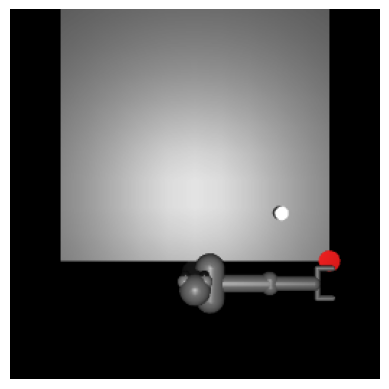

In [3]:
import gymnasium as gym
import numpy as np
import mujoco
import matplotlib.pyplot as plt

env = gym.make("Pusher-v5")
obs, info = env.reset()

model = env.unwrapped.model
data = env.unwrapped.data

# ... same goal_body_id + body_pos modification as before ...
goal_body_id = None
for i in range(model.nbody):
    name = model.body(i).name
    if name is not None and "goal" in name.lower():
        goal_body_id = i

new_goal_xy = np.array([1, -0.5], dtype=float)
model.body_pos[goal_body_id, 0] = new_goal_xy[0]
model.body_pos[goal_body_id, 1] = new_goal_xy[1]

mujoco.mj_forward(model, data)

# ---- Render top-down ----
renderer = mujoco.Renderer(model, height=256, width=256)

cam = mujoco.MjvCamera()
mujoco.mjv_defaultFreeCamera(model, cam)
cam.lookat[:] = np.array([0.0, 0.0, 0.0])
cam.distance = 3.0
cam.azimuth = 90.0
cam.elevation = -90.0

renderer.update_scene(data, camera=cam)
img = renderer.render()
renderer.close()
env.close()

# Show with matplotlib
plt.imshow(img)
plt.axis("off")
plt.show()